# Importing libraries

In [168]:
#pip install gspread oauth2client df2gspread

In [169]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
scope=['https://www.googleapis.com/auth/drive']
credentials=ServiceAccountCredentials.from_json_keyfile_name('milestone1.json',scope)
client=gspread.authorize(credentials)

In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import smtplib
import config
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders
import matplotlib.pyplot as plt
%matplotlib inline

# Sheet data to Dataframe

In [171]:
sheet=client.open_by_url("https://docs.google.com/spreadsheets/d/1HYjfEe3aCbufbqIXKs0Xz-gfoQNztGhCN1ivx0gZXnc/edit#gid=0")

In [172]:
idt=[]
task=[]
date=[]
module=[]
task_type=[]
student=[]
late_submission=[]
points=[]
total=[]
task_winner=[]
for i in sheet:
    data=i.get_all_records()
    for item in data:
        i=item['id']
        idt.append(i)
        t=item['Task']
        task.append(t)
        d=item['Date']
        date.append(d)
        m=item['Module']
        module.append(m)
        tp=item['Type']
        task_type.append(tp)
        s=item['Student']
        student.append(s)
        ls=item['Late Submission']
        late_submission.append(ls)
        pts=item['Points']
        points.append(pts)
        tot=item['Total']
        total.append(tot)
        tw=item['Task Winner']
        task_winner.append(tw)

In [173]:
df_list={}
df_list['Id']=idt
df_list['Task']=task
df_list['Date']=date
df_list['Module']=module
df_list['Type']=task_type
df_list['Student']=student
df_list['Late Submission']=late_submission
df_list['Points']=points
df_list['Total']=total
df_list['Task Winner']=task_winner
df= pd.DataFrame(data=df_list)

In [174]:
df

,Id,Task,Date,Module,Type,Student,Late Submission,Points,Total,Task Winner
0,1,Linkedin Profile create/update,7/22/2019,Profile Building,"Intent, Creativity,Content",Chandrima,0,6.0,10,0
1,1,Linkedin Profile create/update,7/22/2019,Profile Building,"Intent, Creativity,Content",Dipam,0,7.0,10,0
2,1,Linkedin Profile create/update,7/22/2019,Profile Building,"Intent, Creativity,Content",Durga,0,6.0,10,0
3,1,Linkedin Profile create/update,7/22/2019,Profile Building,"Intent, Creativity,Content",Kaushal,0,7.0,10,0
4,1,Linkedin Profile create/update,7/22/2019,Profile Building,"Intent, Creativity,Content",Arya,0,6.0,10,0
5,1,Linkedin Profile create/update,7/22/2019,Profile Building,"Intent, Creativity,Content",Kunal,0,8.0,10,0
6,1,Linkedin Profile create/update,7/22/2019,Profile Building,"Intent, Creativity,Content",Prasoon,0,5.0,10,0
7,1,Linkedin Profile create/update,7/22/2019,Profile Building,"Intent, Creativity,Content",Purbita,0,6.0,10,0
8,1,Linkedin Profile create/update,7/22/2019,Profile Building,"Intent, Creativity,Content",Roumyak,0,6.0,10,0
9,1,Linkedin Profile create/update,7/22/2019,Profile Building,"Intent, Creativity,Content",Shakib,0,6.0,10,0


# Data Cleaning

In [175]:
df['Date']=pd.to_datetime(df['Date'])

In [176]:
def analysis_date_range(start_date,end_date):
    mask=df[(df['Date']>start_date) & (df['Date']<end_date)]
    return mask

In [177]:
new_df=analysis_date_range('2019-01-01','2019-09-16')

In [178]:
new_df

,Id,Task,Date,Module,Type,Student,Late Submission,Points,Total,Task Winner
0,1,Linkedin Profile create/update,2019-07-22 00:00:00,Profile Building,"Intent, Creativity,Content",Chandrima,0,6.0,10,0
1,1,Linkedin Profile create/update,2019-07-22 00:00:00,Profile Building,"Intent, Creativity,Content",Dipam,0,7.0,10,0
2,1,Linkedin Profile create/update,2019-07-22 00:00:00,Profile Building,"Intent, Creativity,Content",Durga,0,6.0,10,0
3,1,Linkedin Profile create/update,2019-07-22 00:00:00,Profile Building,"Intent, Creativity,Content",Kaushal,0,7.0,10,0
4,1,Linkedin Profile create/update,2019-07-22 00:00:00,Profile Building,"Intent, Creativity,Content",Arya,0,6.0,10,0
5,1,Linkedin Profile create/update,2019-07-22 00:00:00,Profile Building,"Intent, Creativity,Content",Kunal,0,8.0,10,0
6,1,Linkedin Profile create/update,2019-07-22 00:00:00,Profile Building,"Intent, Creativity,Content",Prasoon,0,5.0,10,0
7,1,Linkedin Profile create/update,2019-07-22 00:00:00,Profile Building,"Intent, Creativity,Content",Purbita,0,6.0,10,0
8,1,Linkedin Profile create/update,2019-07-22 00:00:00,Profile Building,"Intent, Creativity,Content",Roumyak,0,6.0,10,0
9,1,Linkedin Profile create/update,2019-07-22 00:00:00,Profile Building,"Intent, Creativity,Content",Shakib,0,6.0,10,0


In [179]:
new_df['Task']=new_df['Task'].str.lower()

C:\Users\Purbita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [180]:
new_df['Month']=new_df['Date'].dt.month

C:\Users\Purbita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [181]:
new_df['Month']=new_df['Month'].replace({3:8,4:8})

C:\Users\Purbita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [182]:
new_df.replace({'Swaastik':'Swaastick','Sushree':'Siddhishikha'},inplace=True)

C:\Users\Purbita\Anaconda3\lib\site-packages\pandas\core\frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [183]:
new_df=new_df[new_df['Student']!=""]
new_df=new_df[new_df['Student']!='Wrick']
new_df=new_df[new_df['Student']!='Nitish']
new_df=new_df[new_df['Student']!='Sudhanshu']

In [184]:
def duplicates_removal(task):
    temp=new_df[new_df['Task']==task]
    months=temp['Date'].dt.month.unique().tolist()
    indx=np.array([])
    for date,month in zip(temp['Date'].values,temp['Month'].values):
        mask_date=temp['Date']==date
        mask_month=temp['Month']==month
        d=temp[mask_date & mask_month].sort_values('Student')
        indx=np.append(indx,d[d.duplicated(subset='Student',keep='last')].index)
    temp_1=temp.drop(indx)
    return temp_1

In [185]:
my_df=duplicates_removal('ajkyaukhada')

In [186]:
knowledge_df=duplicates_removal('knowledge sharing')

In [187]:
my_df.shape

(901, 11)

In [188]:
t=knowledge_df[knowledge_df['Date']>'2019-08-14']

In [189]:
t.head()

,Id,Task,Date,Module,Type,Student,Late Submission,Points,Total,Task Winner,Month
557,0,knowledge sharing,2019-08-14 04:39:38,Ritual,"Consistency,Curiosity",Swaastick,0,2.0,2,0,8
558,0,knowledge sharing,2019-08-14 04:47:42,Ritual,"Consistency,Curiosity",Ujjainee,0,2.0,2,0,8
559,0,knowledge sharing,2019-08-14 05:21:39,Ritual,"Consistency,Curiosity",Prasoon,0,2.0,2,0,8
586,0,knowledge sharing,2019-08-14 16:38:37,Ritual,"Consistency,Curiosity",Surabhi,0,2.0,2,0,8
589,0,knowledge sharing,2019-08-14 17:17:39,Ritual,"Consistency,Curiosity",Dipam,0,2.0,2,0,8


In [190]:
t.shape

(77, 11)

In [191]:
sunday=['Arya','Anjali','Surabhi']
monday=['Kunal','Bhavna','Apurwa']
tuesday=['Purbita','Chandrima','Prasoon']
wednesday=['Roumyak','Kaushal','Ujjainee']
thursday=['Shakib','Dipam','Siddhishikha']
friday=['Shantanu','Durga','Sonali']
saturday=['Swaastick','Sharika','Vishal']

In [192]:
t['weekdays']=t['Date'].dt.strftime("%A")

C:\Users\Purbita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [193]:
def knowledge_cleaner(knowledge):
    indx=np.array([])
    c=0
    for c in range (0,len(t['weekdays'])):
        i=t['weekdays'].iloc[c]
        student=knowledge['Student'].iloc[c]
        idx=knowledge['Student'].index[c]
        if i=='Monday':
            if(student not in monday):
                indx=np.append(indx,idx)
        elif i=='Tuesday':
            if(student not in tuesday):
                indx=np.append(indx,idx)
        elif i=='Wednesday':
            if(student not in wednesday):
                indx=np.append(indx,idx)
        elif i=='Thursday':
            if(student not in thursday):
                indx=np.append(indx,idx)
        elif i=='Friday':
            if(student not in friday):
                indx=np.append(indx,idx)
        elif i=='Saturday':
            if(student not in saturday):
                indx=np.append(indx,idx)
        elif i=='Sunday':
            if(student not in sunday):
                indx=np.append(indx,idx)
        c+=1
    return indx

In [194]:
idx=knowledge_cleaner(t)
knowledge_df=knowledge_df.drop(idx)

In [195]:
len(knowledge_df)

76

In [196]:
temp=new_df[new_df['Task']!='ajkyaukhada']
other_tasks=temp[temp['Task']!='knowledge sharing']

In [197]:
student_list=new_df['Student'].unique().tolist()

In [198]:
indx=np.array([])
for i in student_list:
    temp_df=other_tasks[other_tasks['Student']==i]
    indx=np.append(indx,temp_df[temp_df.duplicated(subset='Task',keep='last')].index)
other_tasks=other_tasks.drop(indx)

In [199]:
tasks=other_tasks.groupby('Student')['Points'].sum().reset_index()

In [200]:
myday_df=my_df.groupby('Student')['Points'].sum().reset_index()

In [201]:
knowledge_sharing=knowledge_df.groupby('Student')['Points'].sum().reset_index()

In [202]:
late_submission=other_tasks.groupby('Student')['Late Submission'].sum().reset_index()

In [203]:
wins=other_tasks.groupby('Student')['Task Winner'].sum().reset_index()

In [204]:
tot_task_score=other_tasks.groupby('Student')['Total'].sum().max()

# Merging all scores into one dataframe

In [205]:
final_df=myday_df.merge(knowledge_sharing,on='Student',how='outer')

In [206]:
final_df=final_df.merge(tasks,on='Student',how='outer')

In [207]:
final_df.insert(4,"Total Task Points",tot_task_score)

In [208]:
temp=final_df.drop(columns={'Total Task Points'})
final_df['Total Score'] = temp.sum(axis=1)

In [209]:
final_df=final_df.merge(late_submission,on='Student',how='outer')

In [210]:
final_df=final_df.merge(wins,on='Student',how='outer')

In [211]:
final_df.rename(columns={'Points_x':'MyDay Score','Points_y':'Knowledge Sharing Score','Late Submission':'Total Late Submissions','Task Winner':'Number of Wins','Points':'Task Score Achieved'},inplace=True)

# Analysis

In [213]:
final_df=final_df.sort_values(by='Total Score',ascending=False).reset_index(drop=True)
final_df

,Student,MyDay Score,Knowledge Sharing Score,Task Score Achieved,Total Task Points,Total Score,Total Late Submissions,Number of Wins
0,Kunal,104.0,12.0,160.5,180,276.5,3,3
1,Ujjainee,102.0,15.0,154.5,180,271.5,1,0
2,Purbita,102.0,12.0,151.5,180,265.5,4,2
3,Shakib,100.0,15.0,150.5,180,265.5,2,2
4,Surabhi,102.0,11.0,151.5,180,264.5,2,1
5,Chandrima,102.0,18.0,132.5,180,252.5,4,1
6,Sonali,98.0,9.0,144.0,180,251.0,3,1
7,Vishal,98.0,4.0,149.0,180,251.0,0,1
8,Dipam,102.0,11.0,135.5,180,248.5,1,1
9,Sharika,99.0,8.0,137.5,180,244.5,5,1


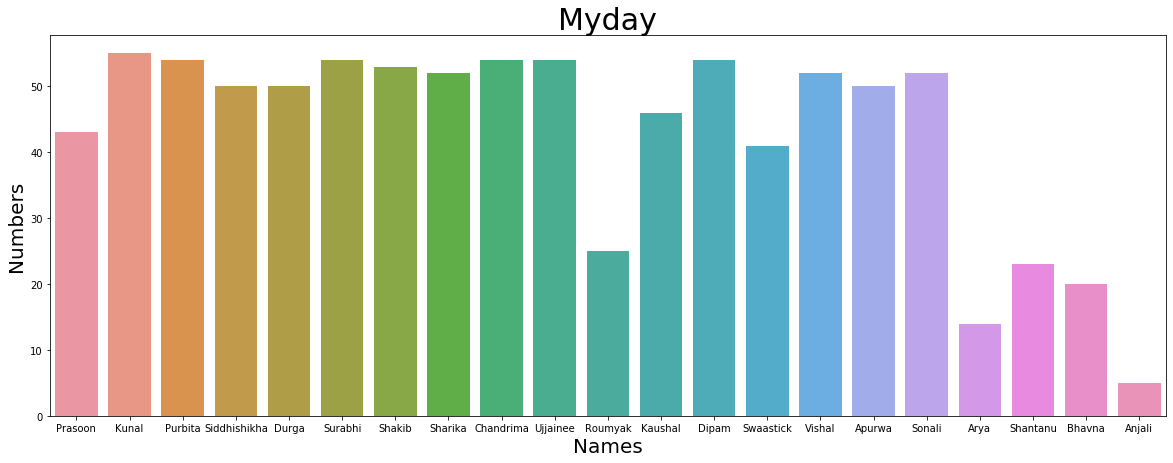

In [214]:
p1=plt.figure(figsize=(20,7))
sns.countplot(x='Student',data=my_df)
plt.xlabel('Names', fontsize=20)
plt.ylabel('Numbers',fontsize=20)
plt.title("Myday",fontsize=30)
plt.show()

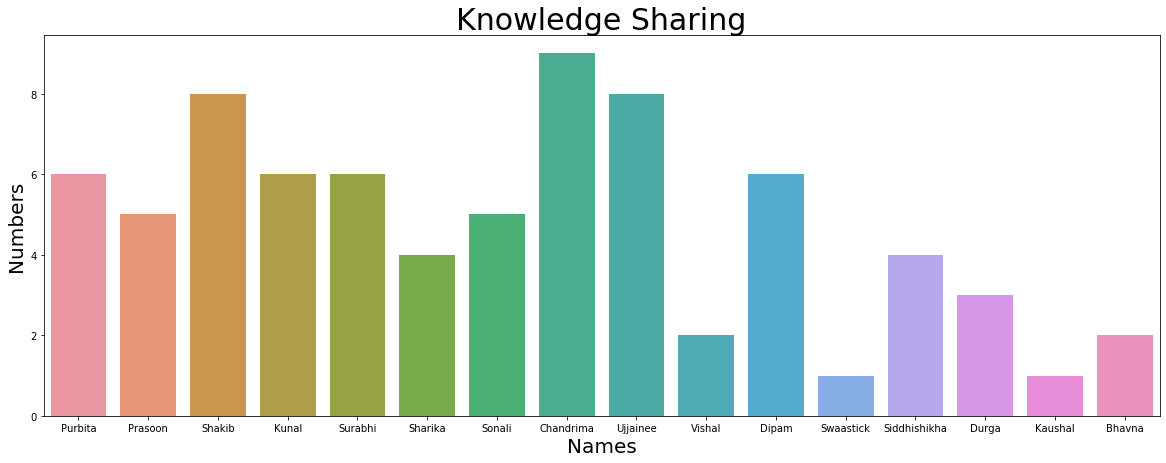

In [215]:
p2=plt.figure(figsize=(20,7))
sns.countplot(x='Student',data=knowledge_df)
plt.xlabel('Names', fontsize=20)
plt.ylabel('Numbers',fontsize=20)
plt.title("Knowledge Sharing",fontsize=30)
plt.show()

In [216]:
len(knowledge_df)

76

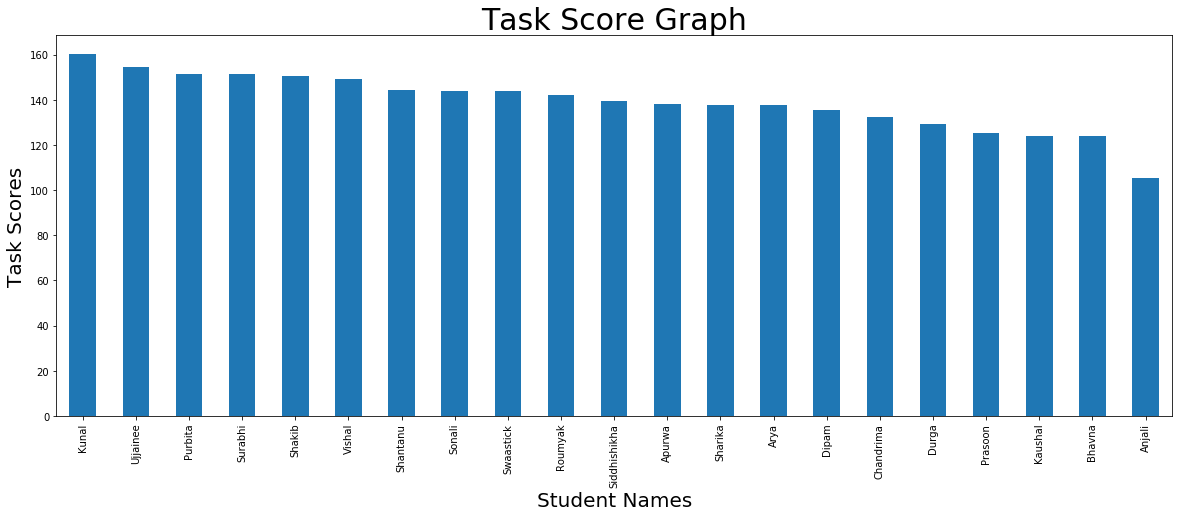

In [217]:
p3=plt.figure(figsize=(20,7))
total=final_df.groupby('Student')['Task Score Achieved'].sum().sort_values(ascending=False)
total.plot.bar(x='Student',y='Task Score Achieved')
plt.xlabel('Student Names',fontsize=20)
plt.ylabel("Task Scores",fontsize=20)
plt.title("Task Score Graph",fontsize=30)
plt.show()

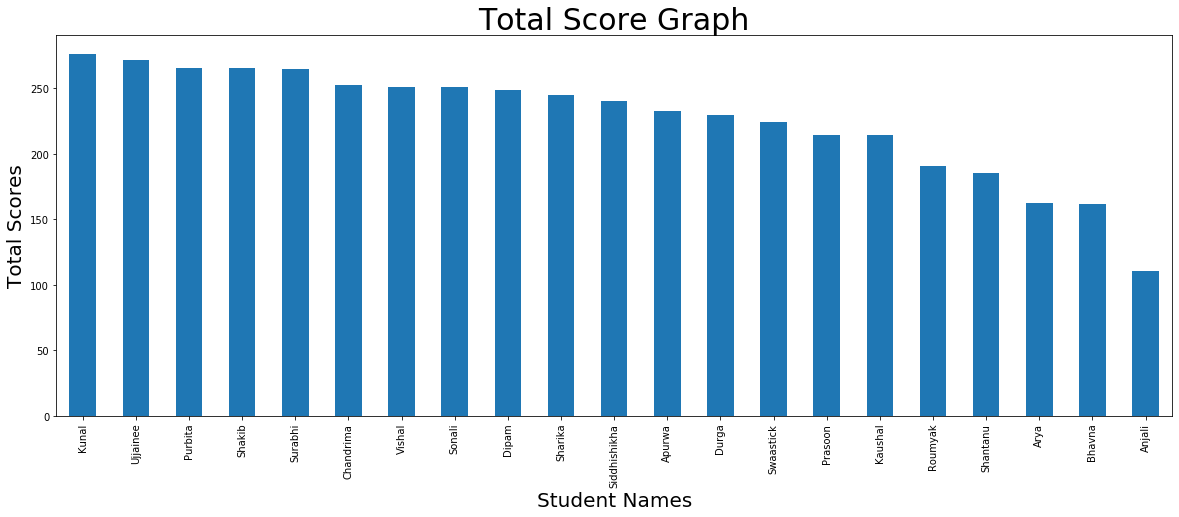

In [218]:
p4=plt.figure(figsize=(20,7))
total=final_df.groupby('Student')['Total Score'].sum().sort_values(ascending=False)
total.plot.bar(x='Student',y='Total Score')
plt.xlabel('Student Names',fontsize=20)
plt.ylabel("Total Scores",fontsize=20)
plt.title("Total Score Graph",fontsize=30)
plt.show()

In [219]:
len(t)

77

In [220]:
len(knowledge_df)

76

# Conversion to pdf

In [221]:
p1.savefig("myday.jpg",bbox_inches='tight')
p2.savefig("knowledge.jpg",bbox_inches='tight')
p3.savefig("task",bbox_inches='tight')
p4.savefig("score",bbox_inches='tight')

In [222]:
#pip install reportlab

In [223]:
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter
from reportlab.lib import colors

In [306]:
def report_creator(name):
    table=final_df[final_df['Student']==name]
    rank=table.index.values[0]+1
    total=table['Task Score Achieved'].iloc[0]
    late=table['Total Late Submissions'].iloc[0]
    win=table['Number of Wins'].iloc[0]
    myday=table['MyDay Score'].iloc[0]
    gyan=table['Knowledge Sharing Score'].iloc[0]
    table1=final_df.head(10)
    student=table1['Student'].values
    tot=table1['Total Score'].values
    my_canvas = canvas.Canvas("Result.pdf",pagesize=letter)
    my_canvas.setLineWidth(.3)
    my_canvas.drawImage("campusx.jpeg", 143, 730,width=52,height=50)
    my_canvas.setFont('Times-Bold', 20)
    my_canvas.drawString(200,750,'CAMPUSX RESULTS')
    my_canvas.setFont('Times-Roman', 14)
    my_canvas.drawString(50,700,'Hi '+name+', here are your results!!')
    my_canvas.setFont('Times-Bold', 13)
    my_canvas.drawString(55,670,'Rank')
    my_canvas.drawString(165,670,'Total Score')
    my_canvas.drawString(305,670,'Task Wins')
    my_canvas.drawString(444,670,'Late Submission')
    my_canvas.setFont('Times-Roman', 13)
    my_canvas.drawString(55,650,str(rank))
    my_canvas.drawString(165,650,str(total))
    my_canvas.drawString(305,650,str(late))
    my_canvas.drawString(444,650,str(win))
    my_canvas.drawString(55,620,"Your Myday Score: "+str(myday))
    my_canvas.drawString(55,605,"Your Knowledge Sharing Score: "+str(gyan))
    my_canvas.setFont('Times-Bold', 15)
    my_canvas.drawString(55,565,"Leaderboard")
    my_canvas.setFont('Times-Bold', 13)
    my_canvas.drawString(55,545,"Name")
    my_canvas.drawString(175,545,"Total Score")
    my_canvas.drawImage("image.jpg",300,380,width=200,height=200)
    my_canvas.setFont('Times-Roman', 12)
    c=525
    for i,j in zip(student,tot):
        my_canvas.drawString(55,c,i)
        my_canvas.drawString(175,c,str(j))
        c-=15
    my_canvas.setFont('Times-Bold', 13)
    my_canvas.drawString(55,350,"Myday Graph")
    my_canvas.drawImage("myday.jpg", 20, 30,width=580,height=300)
    my_canvas.showPage()
    my_canvas.setFont('Times-Bold', 13)
    my_canvas.drawString(55,750,"Knowledge Sharing Graph")
    my_canvas.drawImage("knowledge.jpg", 20, 420,width=580,height=300)
    my_canvas.save()

In [314]:
students=final_df['Student'].unique().tolist()

In [315]:
m = new_df['Date'].dt.strftime("%B")
m = m.replace({'March': 'August', 'April': 'August'})
mon = m.unique().tolist()
st = ""
for i in mon:
    st = st + i + ', '
print(st)

# Sending pdf via email

In [57]:
mails = client.open_by_url("https://docs.google.com/spreadsheets/d/1hTKuo8BCw3wuIt7ITiFjxEE9Xs-Gb9HIPo9GUSis-Vc/edit#gid=252560420")
emails = mails.get_worksheet(0).get_all_records()
names = []
email_ids = []
for i in emails:
    n=i['fname']
    if (n=='Sushree'):
        names.append("Siddhishikha")
    elif (n=='Kunal N.'):
        names.append('Kunal')
    elif (n=='Md Shakib'):
        names.append("Shakib")
    else:
        names.append(n)
    e=i['email']
    email_ids.append(e)
email_list={}
email_list['Names']=names
email_list['Email_id']=email_ids
email_df=pd.DataFrame(data=email_list)
def report_sender_via_email(student_names):
    for i in student_names:
        report_creator(i)
        receivers=email_df['Names'].tolist()
        for j in receivers:
            if (i==j):
                temp=email_df[email_df["Names"]==j]
                e_id=temp['Email_id'].iloc[0]
                email_user = config.email_user
                email_password = config.email_password
                email_send = e_id

                subject = 'CampusX Results'

                msg = MIMEMultipart()
                msg['From'] = email_user
                msg['To'] = email_send
                msg['Subject'] = subject

                body = 'Your Results for '+st
                msg.attach(MIMEText(body,'plain'))

                filename='Result.pdf'
                attachment  =open(filename,'rb')

                part = MIMEBase('application','octet-stream')
                part.set_payload((attachment).read())
                encoders.encode_base64(part)
                part.add_header('Content-Disposition',"attachment; filename= "+filename)

                msg.attach(part)
                text = msg.as_string()
                server = smtplib.SMTP('smtp.gmail.com',587)
                server.starttls()
                server.login(email_user,email_password)


                server.sendmail(email_user,email_send,text)
                server.quit()
report_sender_via_email(students)


(221, b'2.0.0 closing connection r11sm13920204pgn.67 - gsmtp')